In [283]:
try:
    import import_ipynb
except :
    !pip install import_ipynb
    import import_ipynb
import Predistim_Library as pl

In [284]:
import os
import pandas as pd
from scipy.io import loadmat
import glob
from plotnine import ggplot, aes, geom_point, labs
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_errorbar, geom_line, geom_point, labs, theme_minimal
import nibabel as nib
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import statsmodels.api as sm
import plotly.express as px


# Récuperer les valeurs UPDRS 

In [334]:
df_age_hy = pd.read_excel(os.path.join(pl.STUDY_PATH, "csv_xlsx", "Bio_Ima_Gen_V3_20210205_2.xlsx"), engine='openpyxl')
df_age_hy.set_index("PatientID", inplace=True)
df_age_hy.index = df_age_hy.index.str.slice(0, 2).str.cat(df_age_hy.index.str.slice(2,-2), sep="-")
# Filtrer les sujets ayant Age > 55 et HY_OFF_V0 dans la plage (0, 3)
filtered_subjects = df_age_hy[(df_age_hy['Age'] > 55) & (df_age_hy['HY_OFF_V0'] > 0) & (df_age_hy['HY_OFF_V0'] < 3)]
filtered_subjects = df_age_hy

# Récupérer les patients avec age > 55 et Hoen & Yard =1 ou 2

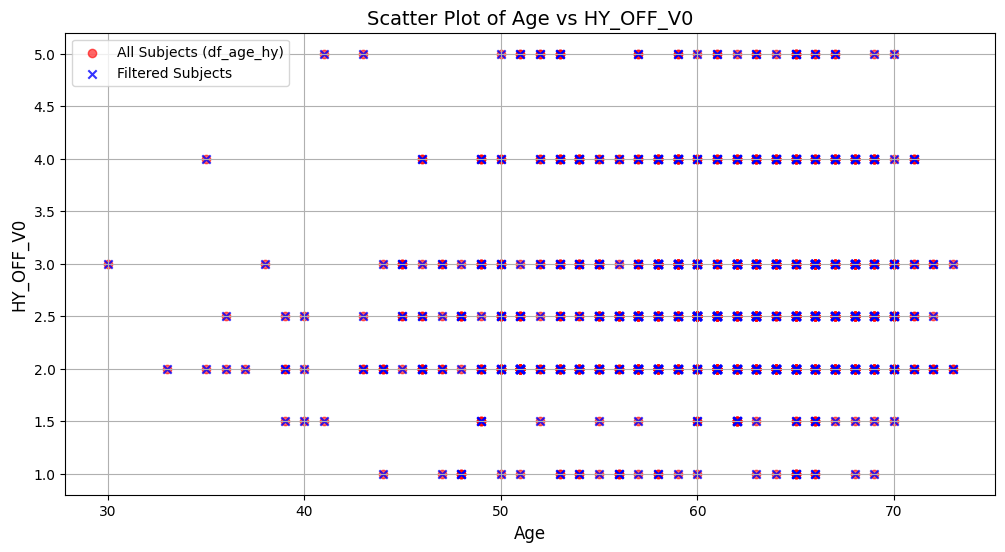

In [335]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_age_hy['Age'], df_age_hy['HY_OFF_V0'], color='red', label='All Subjects (df_age_hy)', alpha=0.6)
plt.scatter(filtered_subjects['Age'], filtered_subjects['HY_OFF_V0'], color='blue', marker='x', label='Filtered Subjects', alpha=0.8)

# Add title and labels
plt.title("Scatter Plot of Age vs HY_OFF_V0", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("HY_OFF_V0", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig("/NAS/deathrow/protocoles/predistim/screenshots/scatter_age_vs_hy_off_v0.jpeg", format='jpeg', dpi=300)

# Show the plot
plt.show()


In [336]:
#1
df_msa = pd.read_excel(os.path.join(pl.STUDY_PATH, "csv_xlsx", "Romain_Juin2025.xlsx"), engine='openpyxl',sheet_name='UPDRSIII_COMPLET_V0')
#print(df_msa.head())
df_msa.set_index("SUBJID", inplace=True)

#2
# Afficher toutes les colonnes contenant "DROIT" dans leur nom
droit_columns = df_msa.filter(regex="OF.*_.*DROIT", axis=1).columns
#print(len(droit_columns),droit_columns)

# Afficher toutes les colonnes contenant "DROIT" dans leur nom
gauche_columns = df_msa.filter(regex="OF.*_.*GCHE", axis=1).columns

df_msa['somme_droit'] = df_msa[droit_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['somme_gauche'] = df_msa[gauche_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['asymetry'] = df_msa['somme_droit'] - df_msa['somme_gauche']
df_msa['asymetry'].dropna(inplace=False)

/tmp/ipykernel_717220/1864820306.py:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_717220/1864820306.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_717220/1864820306.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



SUBJID
Subject Identifier for the Study    0.0
01-001                              3.0
01-002                              1.0
01-003                              4.0
01-004                              2.0
                                   ... 
20-025                             -2.0
20-026                             -6.0
20-027                              2.0
20-028                              0.0
20-029                             -1.0
Name: asymetry, Length: 836, dtype: float64

# read mat files for building a dataframe 

attention pas terrible je prefere utilise les fichiers txt generés avec fslstats cf ..ci dessous 

exemple : fslstats -K /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-18009RJ_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-18009RJ_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-18009RJ_ses-M00/r2_norm_PSR.nii.gz -M > /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-18009RJ_right-putamen_axis1_7segments_r2_norm_values.txt


In [ ]:
mat_data_tmp = loadmat("/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01024FC_ses-M00/mrGradT1only/mrGrad_t1overt2.mat")
y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

# Production des fichiers txt contenant les valeurs moyen par segment avec fslstats

In [414]:
# Chemin vers le répertoire contenant les données des patients
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"
sorted_patient_dirs = sorted(glob.glob(os.path.join(base_dir, "sub-*00")))

# Parcourir les répertoires des patients
for patient_dir in sorted_patient_dirs:
    # Extraire l'ID du patient à partir du nom du répertoire
    patient_id = os.path.basename(patient_dir)
    #print(f"Traitement du patient : {patient_id}")

    # Chemins des fichiers pour le patient actuel
    # t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
    # t1overt2_file = os.path.join(patient_dir, "T1overT2_N4_medianNorm.nii.gz")
    t1overt2_file = os.path.join(patient_dir, "T1overT2_Elior_d2_median_IQR_Norm.nii.gz")    
    t1overt2_file = os.path.join(patient_dir, "R2effective.nii.gz")
    # t1overt2_file = os.path.join("/NAS/deathrow/protocoles/predistim/R2",patient_id[4:11] ,"R2_lin_3DT1.nii.gz")
    # t1overt2_file = os.path.join(patient_dir, "t2_LAS.nii.gz")
    left_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    right_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")
    # Vérifier si les fichiers existent
    if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
        #print(f"Fichiers manquants pour le patient {patient_id}, passage au suivant.")
        continue

    # print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
    # print(f"python inverseROInumber.py {right_seg_file}")
    # print(f"python inverseROInumber.py {left_seg_file}")   

    command = (
        f"qbatch -q three_job_q -oe /NAS/dumbo/protocoles/PACTE1/scripts/log/ -N p_w{patient_id} eval \""
        #f"mri_convert {t1overt2_file} -rl {left_seg_file} {t1overt2_file.replace('.nii.gz','_rlon3DT1.nii.gz')};"
        # f"fslstats -K {left_seg_file} {t1overt2_file.replace('.nii.gz','_rlon3DT1.nii.gz')} -M > {patient_dir}_patient_id_left-putamen_axis1_7segments_t2w_values.txt;"
        # f"fslstats -K {right_seg_file} {t1overt2_file.replace('.nii.gz','_rlon3DT1.nii.gz')} -M > {patient_dir}_patient_id_right-putamen_axis1_7segments_t2w_values.txt;\""
        f"fslstats -K {left_seg_file} {t1overt2_file} -M > {patient_dir}_patient_id_left-putamen_axis1_7segments_R2effective_values_VolbrainSeg.txt;"
        f"fslstats -K {right_seg_file} {t1overt2_file} -M > {patient_dir}_patient_id_right-putamen_axis1_7segments_R2effective_values_VolbrainSeg.txt;\""
    )
    if not os.path.exists(f"{patient_dir}_patient_id_left-putamen_axis1_7segments_R2effective_values_VolbrainSeg.txt"):
        print(command)

qbatch -q three_job_q -oe /NAS/dumbo/protocoles/PACTE1/scripts/log/ -N p_wsub-01001SR_ses-M00 eval "fslstats -K /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/R2effective.nii.gz -M > /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00_patient_id_left-putamen_axis1_7segments_R2effective_values_VolbrainSeg.txt;fslstats -K /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/R2effe

# solution en python mais plus lente 

In [ ]:
from concurrent.futures import ProcessPoolExecutor, as_completed

def process_patient(patient_dir):
    import os
    import numpy as np
    import nibabel as nib

    patient_id = os.path.basename(patient_dir)
    t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
    left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    right_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

    if os.path.exists(t1overt2_file) and os.path.exists(left_seg_file) and os.path.exists(right_seg_file):
        img = nib.load(t1overt2_file)
        img_data = img.get_fdata()
        seg_left_data = nib.load(left_seg_file).get_fdata()
        seg_right_data = nib.load(right_seg_file).get_fdata()
        mask_left = seg_left_data > 4
        mask_right = seg_right_data > 4
        mean_left = img_data[mask_left].mean() if np.any(mask_left) else np.nan
        mean_right = img_data[mask_right].mean() if np.any(mask_right) else np.nan
        return patient_id, mean_left, mean_right
    else:
        return patient_id, np.nan, np.nan

results = []
with ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_patient, patient_dir) for patient_dir in sorted_patient_dirs]
    for future in as_completed(futures):
        patient_id, mean_left, mean_right = future.result()
        print(f"{patient_id}: Left={mean_left}, Right={mean_right}")
        results.append((patient_id, mean_left, mean_right))


sub-01002TM_ses-M00: Left=1.6608031566550092, Right=1.5574397850353983
sub-01006DF_ses-M00: Left=1.329090098145356, Right=1.3903092002266677
sub-01003SJ_ses-M00: Left=1.3499601258980958, Right=1.318063988495145
sub-01005LB_ses-M00: Left=1.218159922494522, Right=1.1858552709209005
sub-01001SR_ses-M00: Left=1.0759670760533582, Right=1.1784864481626534
sub-01008GM_ses-M00: Left=1.3222215548324372, Right=1.2359176432745798
sub-01007HC_ses-M00: Left=1.2063741409899573, Right=1.077809945893325
sub-01004DJ_ses-M00: Left=1.7291273915192538, Right=1.6410706873395955
sub-01009WF_ses-M00: Left=1.3421948858036, Right=1.3205426726358156
sub-01010VD_ses-M00: Left=1.0942988732698802, Right=1.065175777249057
sub-01011BB_ses-M00: Left=1.186236330909779, Right=1.1846027451848227
sub-01012BB_ses-M00: Left=1.2675700574264832, Right=1.2951552591114637
sub-01017TA_ses-M00: Left=1.4012763862833013, Right=1.2982197630604477
sub-01013PR_ses-M00: Left=1.4858015347849487, Right=1.4215880633008724
sub-01015HC_ses

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f729695ca10>>
Traceback (most recent call last):
  File "/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Chemin vers les fichiers
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/"
#file_pattern = "sub-*/mrGrad/mrGrad_t1overt2.mat"
file_pattern = "sub-*/mrGradT1only/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradQSMoverR2/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradR2/mrGrad_t1overt2.mat"

# Récupérer les chemins des fichiers
# Ensure glob_files function exists and works correctly
try:
    file_paths = glob.glob(os.path.join(base_path, file_pattern), recursive=True)
except AttributeError as e:
    print(f"Error: {e}. Ensure 'glob_files' is implemented in 'Predistim_Library'.")
    file_paths = []  # Fallback to an empty list if there's an error

# Initialiser une liste pour stocker les données
data = []

# Parcourir les fichiers et charger les données
for file_path in file_paths:
    #subject_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  # Extraire le nom du sujet
    mat_data = loadmat(file_path)  # Charger le fichier .mat
    try:
        subject_names = str(mat_data['RG'][0][0]['subject_names'][0][0][0][0][0])
        print(subject_names)
        # Extract and store data with labels
        try:
            roi_label_0 = mat_data['RG'][0][0]['ROI_label'][0][0][0]
            roi_label_1 = mat_data['RG'][0][1]['ROI_label'][0][0][0]
            y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
            y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

            data.append({
                'subject_name': subject_names,
                f"{roi_label_0}_seg1": y_data_0[0],
                f"{roi_label_0}_seg2": y_data_0[1],
                f"{roi_label_0}_seg3": y_data_0[2],
                f"{roi_label_0}_seg4": y_data_0[3],
                f"{roi_label_0}_seg5": y_data_0[4],
                f"{roi_label_0}_seg6": y_data_0[5],
                f"{roi_label_0}_seg7": y_data_0[6],
                f"{roi_label_1}_seg1": y_data_1[0],
                f"{roi_label_1}_seg2": y_data_1[1],
                f"{roi_label_1}_seg3": y_data_1[2],
                f"{roi_label_1}_seg4": y_data_1[3],
                f"{roi_label_1}_seg5": y_data_1[4],
                f"{roi_label_1}_seg6": y_data_1[5],
                f"{roi_label_1}_seg7": y_data_1[6],
            })
        except KeyError as e:
            print(f"KeyError: {e}. Ensure 'ROI_label' and 'Y' exist in mat_data['RG'].")
    except KeyError as e:
        print(f"KeyError: {e}. 'subject_names' not found in mat_data['RG'].")
    #data.append({'subject_name': subject_name, 'data': mat_data})

# Créer un DataFrame
df = pd.DataFrame(data).set_index('subject_name')

# Clean index
df_cleaned = df.dropna()
df_cleaned.index = df_cleaned.index.str.replace("sub-", "", regex=False)
df_cleaned.index = df_cleaned.index.str.replace("_ses-M00", "", regex=False)
df_cleaned.index = df_cleaned.index.str.slice(0, 2).str.cat(df_cleaned.index.str.slice(2,-2), sep="-")

print(df_cleaned)

sub-01010VD_ses-M00
sub-01043GC_ses-M00
sub-02074AS_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05036PJ_ses-M00
sub-06078BS_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07055BC_ses-M00
sub-07058PP_ses-M00
sub-07092DH_ses-M00
sub-08018JC_ses-M00
sub-08027BB_ses-M00
sub-13031GA_ses-M00
sub-13038RS_ses-M00
sub-14009DP_ses-M00
sub-17010BG_ses-M00
sub-17020LP_ses-M00
sub-17032TJ_ses-M00
sub-17050PD_ses-M00
sub-17071PM_ses-M00
sub-19012GD_ses-M00
sub-05014BJ_ses-M00
sub-02080RM_ses-M00
sub-06003LP_ses-M00
sub-06035PD_ses-M00
sub-07021FC_ses-M00
sub-07033QJ_ses-M00
sub-07046PF_ses-M00
sub-09010NL_ses-M00
sub-11023OF_ses-M00
sub-13021DE_ses-M00
sub-13026RD_ses-M00
sub-15027LJ_ses-M00
sub-14029DC_ses-M00
sub-17068MJ_ses-M00
sub-18019CT_ses-M00
sub-19008GG_ses-M00
sub-19050PM_ses-M00
sub-04008QM_ses-M00
sub-07026BP_ses-M00
sub-01009WF_ses-M00
sub-06043VR_ses-M00
sub-04005BV_ses-M00
sub-06055CP_ses-M00
sub-06074WA_ses-M00


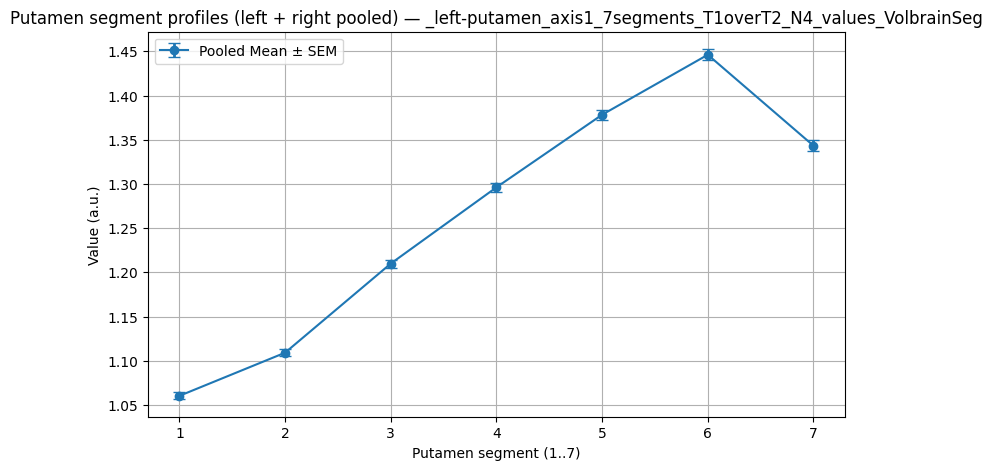

Saved plot for pattern sub-*_left-putamen_axis1_7segments_T1overT2_N4_values_VolbrainSeg.txt -> /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/pooled_putamen_profiles__left-putamen_axis1_7segments_T1overT2_N4_values_VolbrainSeg.jpeg
Pooled mean: [1.0603998319604615, 1.109182161449753, 1.2099330164744644, 1.2961700024711698, 1.3782713228995058, 1.4460886680395386, 1.3432163879736407]


In [494]:
# Chemin vers les fichiers texte
# Chemin vers les fichiers texte et plusieurs motifs à traiter
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"
patterns = [
    # "sub-*_left-putamen_axis1_7segments_T1overT2_Elior_d2_values_VolbrainSeg.txt",
    # "sub-*_left-putamen_axis1_7segments_T1overT2_Elior_d2_iqr_values_VolbrainSeg.txt",
    "sub-*_left-putamen_axis1_7segments_T1overT2_N4_values_VolbrainSeg.txt",
    # "sub-*_left-putamen_axis1_7segments_R2effective_values_VolbrainSeg.txt",
    # "sub-*_left-putamen_axis1_7segments_t1overt2_values.txt",
    # "sub-*_left-putamen_axis1_7segments_r2_mean_values.txt",
    # "sub-*_left-putamen_axis1_7segments_t2w_values.txt",
]

# segments attendu (utilise n_segments déjà défini dans le notebook)
segments = list(range(1, n_segments + 1))

for pat in patterns:
    file_pattern = os.path.join(base_path, pat)
    files = sorted(glob.glob(file_pattern))
    if not files:
        print(f"No files for pattern: {pat}")
        continue

    data = []
    for left_file in files:
        # vérifier que le fichier right correspondant existe
        right_file = left_file.replace("left", "right")
        if not os.path.exists(right_file):
            # skip if no matching right file
            print(f"Missing right file for {left_file}, skipping")
            continue

        subject_id = os.path.basename(left_file).split("_")[0]
        # lire valeurs left
        vals_left = []
        with open(left_file, "r") as f:
            for ln in f:
                ln = ln.strip()
                if not ln or "missing label" in ln:
                    continue
                try:
                    vals_left.append(float(ln))
                except ValueError:
                    # ignore non-numeric lines
                    continue
        # lire valeurs right
        vals_right = []
        with open(right_file, "r") as f:
            for ln in f:
                ln = ln.strip()
                if not ln or "missing label" in ln:
                    continue
                try:
                    vals_right.append(float(ln))
                except ValueError:
                    continue

        # Only keep entries with expected number of segments
        if len(vals_left) >= n_segments and len(vals_right) >= n_segments:
            row = [subject_id] + vals_left[:n_segments] + vals_right[:n_segments]
            data.append(row)
        else:
            print(f"Unexpected number of values for {subject_id}: left={len(vals_left)}, right={len(vals_right)}")

    if not data:
        print(f"No valid subject data for pattern: {pat}")
        continue

    cols = ["subject_name"] + [f"Left-Putamen_seg{i}" for i in segments] + [f"Right-Putamen_seg{i}" for i in segments]
    df_pat = pd.DataFrame(data, columns=cols).set_index("subject_name")
    # clean index to match convention used elsewhere
    df_pat_clean = df_pat.dropna()
    df_pat_clean.index = df_pat_clean.index.str.replace("sub-", "", regex=False)
    df_pat_clean.index = df_pat_clean.index.str.replace("_ses-M00", "", regex=False)
    df_pat_clean.index = df_pat_clean.index.str.slice(0, 2).str.cat(df_pat_clean.index.str.slice(2,-2), sep="-")

    # pool left + right and compute mean ± SEM per segment
    pooled_mean = []
    pooled_sem = []
    for seg in segments:
        pooled = pd.concat([df_pat_clean[f"Left-Putamen_seg{seg}"], df_pat_clean[f"Right-Putamen_seg{seg}"]]).dropna()
        pooled_mean.append(pooled.mean())
        pooled_sem.append(pooled.sem())

    # plot
    plt.figure(figsize=(9, 5))
    plt.errorbar(segments, pooled_mean, yerr=pooled_sem, fmt='-o', color='C0',
                 elinewidth=2, capsize=4, label='Pooled Mean ± SEM')
    plt.xlabel('Putamen segment (1..7)')
    plt.ylabel('Value (a.u.)')
    title_safe = pat.replace("*", "").replace("sub-", "").replace(".txt", "")
    plt.title(f'Putamen segment profiles (left + right pooled) — {title_safe}')
    plt.grid(True)
    plt.legend()
    out_fname = os.path.join(base_path, f"pooled_putamen_profiles_{title_safe}.jpeg")
    plt.savefig(out_fname, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved plot for pattern {pat} -> {out_fname}")
    print("Pooled mean:", pooled_mean)

{'01-001': '01--0',
 '01-002': '01--0',
 '01-003': '01--0',
 '01-004': '01--0',
 '01-005': '01--0',
 '01-006': '01--0',
 '01-007': '01--0',
 '01-008': '01--0',
 '01-009': '01--0',
 '01-010': '01--0',
 '01-011': '01--0',
 '01-012': '01--0',
 '01-013': '01--0',
 '01-015': '01--0',
 '01-016': '01--0',
 '01-017': '01--0',
 '01-018': '01--0',
 '01-019': '01--0',
 '01-020': '01--0',
 '01-021': '01--0',
 '01-022': '01--0',
 '01-023': '01--0',
 '01-024': '01--0',
 '01-025': '01--0',
 '01-026': '01--0',
 '01-027': '01--0',
 '01-028': '01--0',
 '01-029': '01--0',
 '01-030': '01--0',
 '01-031': '01--0',
 '01-032': '01--0',
 '01-033': '01--0',
 '01-034': '01--0',
 '01-035': '01--0',
 '01-037': '01--0',
 '01-038': '01--0',
 '01-039': '01--0',
 '01-040': '01--0',
 '01-042': '01--0',
 '01-043': '01--0',
 '01-044': '01--0',
 '01-045': '01--0',
 '01-046': '01--0',
 '01-047': '01--0',
 '01-048': '01--0',
 '01-049': '01--0',
 '01-051': '01--0',
 '02-030': '02--0',
 '02-038': '02--0',
 '02-039': '02--0',


In [513]:
 # Calculate asymmetry for each segment
n_segments=7

 # Graphique des lignes de putamen
left_columns = [f"Left-Putamen_seg{i}" for i in range(1, n_segments + 1)]
right_columns = [f"Right-Putamen_seg{i}" for i in range(1, n_segments + 1)]

for seg in range(1, n_segments + 1):
    left = df_pat_clean[f"Left-Putamen_seg{seg}"]
    right = df_pat_clean[f"Right-Putamen_seg{seg}"]
    asym = (left - right) / ((left + right) / 2)
    df_pat_clean[f"Putamen_axis1_seg{seg}_asym"] = asym

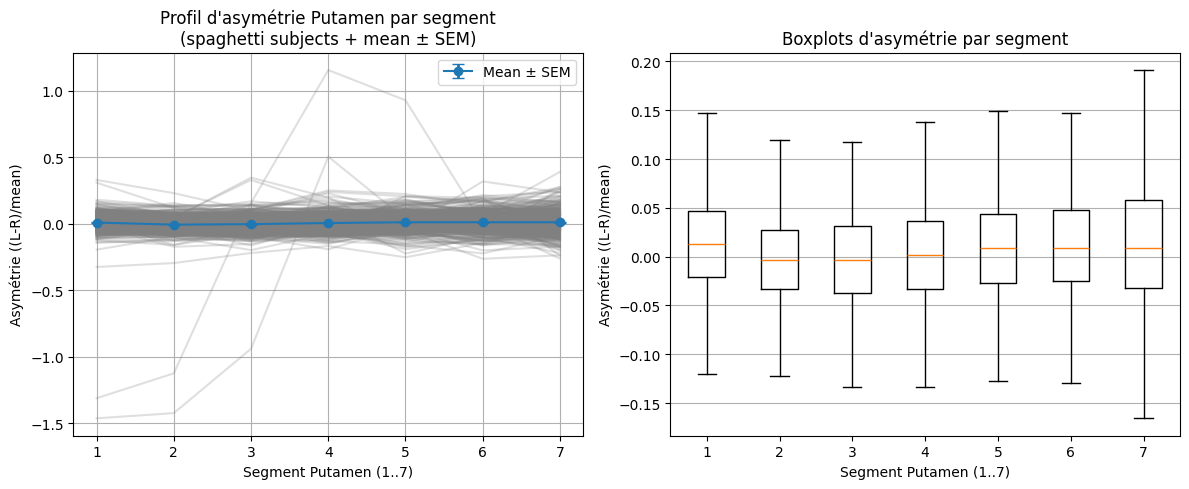

In [514]:
# plot Putamen_axis1_seg{seg}_asym (mean ± SEM + per-subject lines + boxplots)
seg_cols = [f"Putamen_axis1_seg{i}_asym" for i in range(1, n_segments + 1)]
seg_cols = [c for c in seg_cols if c in df_pat_clean.columns]
if not seg_cols:
    print("Aucune colonne d'asymétrie Putamen trouvée dans df_pat_clean.")
else:
    df_plot = df_pat_clean[seg_cols].dropna(how='all')  # keep rows with at least one value
    means = df_plot.mean()
    sems = df_plot.sem()

    x = list(range(1, len(seg_cols) + 1))

    plt.figure(figsize=(12, 5))

    # left: spaghetti + mean±SEM
    plt.subplot(1, 2, 1)
    for _, row in df_plot.iterrows():
        y = row.values.astype(float)
        mask = ~np.isnan(y)
        if mask.sum() > 0:
            plt.plot(np.array(x)[mask], y[mask], color='gray', alpha=0.25)
    plt.errorbar(x, means, yerr=sems, fmt='-o', color='C0', elinewidth=2, capsize=4, label='Mean ± SEM')
    plt.xticks(x, [int(c.split('seg')[-1].split('_')[0]) for c in seg_cols])
    plt.xlabel('Segment Putamen (1..7)')
    plt.ylabel('Asymétrie ((L-R)/mean)')
    plt.title('Profil d\'asymétrie Putamen par segment\n(spaghetti subjects + mean ± SEM)')
    plt.grid(True)
    plt.legend()

    # right: boxplots per segment
    plt.subplot(1, 2, 2)
    data_for_box = [df_plot[c].dropna().values for c in seg_cols]
    plt.boxplot(data_for_box, labels=[c.split('seg')[-1].split('_')[0] for c in seg_cols], showfliers=False)
    plt.xlabel('Segment Putamen (1..7)')
    plt.ylabel('Asymétrie ((L-R)/mean)')
    plt.title('Boxplots d\'asymétrie par segment')
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

## Calcul de l'index d'asymetrie par segment "Putamen_axis1_seg{seg}_asym"

In [539]:
mri = pl.df_mri_data_M00.copy()
mri = mri.set_index(" Code patient", drop=True)
mri.index = mri.index.astype(str).str.strip()
qc_cols = mri.filter(like='QC 3DT1', axis=1).columns.tolist()
meta_cols = [" Code patient", "Centre", "constructeur", "modèle", "antenne","champ"]
meta_cols = [c for c in meta_cols if c in mri.columns]

mri.head()

# Créer un dictionnaire pour relier l'index original de df à l'index nettoyé (df_cleaned)
index_map = {
    orig_idx: orig_idx.replace("sub-", "").replace("_ses-M00", "")[:2] + "-" + orig_idx.replace("sub-", "").replace("_ses-M00", "")[2:-2]
    for orig_idx in mri.index
}
inverse_index_map = {v: k for k, v in index_map.items()}
#inverse_index_map.get('15-028')


new_index = [ index_map.get(i) for i in mri.index ]
# compter les non-mappés (qui restent identiques)
n_unmapped = sum(1 for old, new in zip(mri.index, new_index) if str(old) == str(new))

mri = mri.copy()
mri.index = new_index
mri.index.name = "subject_name"
mri.head()


,Centre,Date d'IRM Dicom,commentaire,constructeur,modèle,champ,logiciel,antenne,respect du protocole,QC 3DT1 \n0: inexploitable 1: très limite 2: passable 3: bien\n4: parfaite,décision 3DT1\n0: rejet\n1: rescan\n3: limite\n4: OK,commentaire 3DT1 qualité (paramètrès),3DT1 sans correction de distorsion géométrique,3DT1 avec correction de distorsion géométrique
subject_name,,,,,,,,,,,,,,
01-001,Lille,2013-11-20 00:00:00,NaN,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,3.0,4.0,pas Ipat + 8ch,oui,non
01-002,Lille,2014-01-15 00:00:00,NaN,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,3.0,4.0,pas Ipat + 8ch,non,oui
01-003,Lille,2014-03-04 00:00:00,NaN,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,1.0,0.0,mouvements (pas Ipat + 8ch),non,oui
01-004,Lille,2014-05-14 00:00:00,NaN,Philips,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,2.0,3.0,mouvements (pas Ipat + 8ch),non,oui
01-005,Lille,2014-06-18 00:00:00,NaN,Philips,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,3.0,3.0,mouvements (pas Ipat + 8ch),non,oui


In [544]:
# Merge df_pat_clean and mri on the common key 'subject_name'
# This is robust to either dataframe having 'subject_name' as index or as a column.

left = df_pat_clean.copy()
right = mri.copy()

# Ensure 'subject_name' is a column in both
if 'subject_name' not in left.columns:
    left = left.reset_index().rename(columns={left.index.name or 'index': 'subject_name'})

if 'subject_name' not in right.columns:
    right = right.reset_index().rename(columns={right.index.name or 'index': 'subject_name'})

# Merge (inner join to keep only subjects present in both)
df_mri_by_subject = pd.merge(left, right, on='subject_name', how='inner', suffixes=('_putamen', '_mri'))

# Set index to subject_name for convenience
df_mri_by_subject.set_index('subject_name', inplace=True)

# Quick checks
print(f"Left rows: {len(left)}, Right rows: {len(right)}, Merged rows: {len(df_mri_by_subject)}")
display(df_mri_by_subject.head())
print(f"n = {len(df_mri_by_subject)}")


Left rows: 607, Right rows: 791, Merged rows: 607


,Left-Putamen_seg1,Left-Putamen_seg2,Left-Putamen_seg3,Left-Putamen_seg4,Left-Putamen_seg5,Left-Putamen_seg6,Left-Putamen_seg7,Right-Putamen_seg1,Right-Putamen_seg2,Right-Putamen_seg3,...,modèle,champ,logiciel,antenne,respect du protocole,QC 3DT1 \n0: inexploitable 1: très limite 2: passable 3: bien\n4: parfaite,décision 3DT1\n0: rejet\n1: rescan\n3: limite\n4: OK,commentaire 3DT1 qualité (paramètrès),3DT1 sans correction de distorsion géométrique,3DT1 avec correction de distorsion géométrique
subject_name,,,,,,,,,,,,,,,,,,,,,
01-001,1.058108,1.016051,1.066998,1.108535,1.120241,1.138075,1.078792,0.999547,0.973889,1.065255,...,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,3.0,4.0,pas Ipat + 8ch,oui,non
01-002,1.343007,1.340779,1.473049,1.565247,1.727047,1.845374,1.539472,1.158428,1.291863,1.417266,...,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,3.0,4.0,pas Ipat + 8ch,non,oui
01-003,1.015611,1.028547,1.082047,1.180851,1.222182,1.331535,1.236765,1.102326,1.123506,1.184762,...,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,1.0,0.0,mouvements (pas Ipat + 8ch),non,oui
01-004,1.143618,1.219241,1.367281,1.489561,1.588928,1.601392,1.472694,1.103483,1.165983,1.336808,...,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,2.0,3.0,mouvements (pas Ipat + 8ch),non,oui
01-005,1.017089,1.043797,1.088363,1.126368,1.183665,1.248000,1.157910,0.949859,0.976398,1.079911,...,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,3.0,3.0,mouvements (pas Ipat + 8ch),non,oui


n = 607


In [543]:
#df_intersection_filtered = df_intersection[df_intersection.index.str.startswith("01-")]

# Filter out subjects with T1overT2_asymetry_seg greater than 100
# df_intersection = df_intersection[df_intersection['T1overT2_asymetry_seg'] <= 50]
# df_intersection = df_intersection[df_intersection['T1overT2_asymetry_seg'] > -50]

# Create groups based on the first two characters of the index
#df_intersection['Group'] = df_intersection.index.str.slice(0, 2)
#df_intersection_filtered = df_intersection
#df_intersection_filtered = df_intersection[~df_intersection.index.isin(df_intersection[df_intersection['Group'] == "14"].index)]
#df_intersection_filtered = df_intersection[~df_intersection.index.isin(df_intersection[df_intersection['Group'] == "06"].index)]
#df_intersection_filtered = df_intersection_filtered[~df_intersection_filtered.index.isin(df_intersection_filtered[df_intersection_filtered['Group'] == "07"].index)]

# Filter out rows where motor_symptom_asymetry is greater than 1 or less than -1
#df_intersection = df_intersection[(df_intersection['motor_symptom_asymetry'] <= 1) & (df_intersection['motor_symptom_asymetry'] >= -1)]


#df_asym = df_asym[~df_asym.index.isin(df_asym[df_asym['modèle'] == "Skyra"].index)]
#df_asym = df_asym[df_asym.index.isin(df_asym[df_asym['constructeur'] == "Philips"].index)]
#df_asym = df_asym[df_asym.index.isin(df_asym[df_asym['constructeur'] == "Siemens"].index)]
#df_asym = df_asym[~df_asym.index.isin(df_asym[df_asym['constructeur'] == "Siemens"].index)]
df_asym = df_mri_by_subject[df_mri_by_subject.index.isin(df_mri_by_subject[df_mri_by_subject['QC 3DT1 \n0: inexploitable 1: très  limite   2: passable       3: bien\n4: parfaite']>2].index)]
print(f"n = {len(df_asym)}")
df_asym = df_asym[df_asym.index.isin(df_asym[df_asym['champ']=="3T"].index)]
print(f"n = {len(df_asym)}")


n = 478
n = 463


In [548]:
# Calculate pp asymmetry for segments 5 to 7
pp_segments = [f"Putamen_axis1_seg{seg}_asym" for seg in range(5, 8)]
df_asym["pp_asym"] = df_asym[pp_segments].mean(axis=1)
print(df_asym[pp_segments].mean(axis=1))

subject_name
01-001   -0.024416
01-002    0.022811
01-005    0.036756
01-006   -0.044911
01-009   -0.038270
            ...   
19-048   -0.046064
19-049   -0.009719
19-050   -0.017638
19-051   -0.009796
19-052    0.004538
Length: 463, dtype: float64


In [573]:
df_msa

,V12H_APRES,DEMIVIE_AGONISTE,H_LDOPA,DOSE_LDOPA,OFF_H,ON_H15,ON_H30,ON_H45,ON_H60,ON_H90,...,TOT_OFF_DRUG,TOT_ON_DRUG_1,TOT_ON_DRUG_2,TOT_ON_DRUG_3,TOT_ON_DRUG_4,TOT_ON_DRUG_5,TOT_ON_DRUG_6,somme_droit,somme_gauche,asymetry
SUBJID,,,,,,,,,,,,,,,,,,,,,
Subject Identifier for the Study,réalisation après 12h d'arret L-Dopa,réalisation après 5 demie-vies d'arret agoniste,heure de prise de L Dopa,dose de L Dopa,off heure,on 15 heure,on 30 heure,on 45 heure,on 60 heure,on 90 heure,...,off total,on 15 total,on 30 total,on 45 total,on 60 total,on 90 total,on 120 total,0.0,0.0,0.0
01-001,Oui,Oui,09:00,200,09:00,09:15,09:30,09:45,10:00,10:30,...,27,26,16,13,18,22,28,10.0,7.0,3.0
01-002,Oui,Oui,09:47,350,09:46,10:10,10:25,10:43,11:03,11:30,...,40,35,29,16,6,1,1,15.0,14.0,1.0
01-003,Oui,.K,09:00,400,08:50,09:17,09:34,09:54,10:14,10:40,...,49,35,19,14,15,16,22,20.0,16.0,4.0
01-004,Oui,Oui,09:25,500,09:20,09:46,10:06,10:30,10:45,11:15,...,54,39,5,6,11,13,22,17.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-025,Oui,Oui,09:02,200,08:48,09:20,09:34,09:48,10:03,10:40,...,26,16,11,9,7,13,14,7.0,9.0,-2.0
20-026,Oui,Oui,07:48,200,07:40,08:04,08:17,08:33,08:46,09:20,...,27,14,8,4,1,3,6,7.0,13.0,-6.0
20-027,Oui,Oui,08:25,300,08:20,08:40,08:54,09:13,09:26,09:57,...,34,28,6,6,6,12,9,14.0,12.0,2.0


In [572]:
# créer df_intersection en prenant toutes les colonnes de df_asym et df_msa pour les sujets communs
intersection_index = df_asym.index.intersection(df_msa.index)

left = df_asym.loc[intersection_index].copy()
right = df_msa.loc[intersection_index,'motor_symptom_asymetry'].copy()

# joindre en ajoutant des suffixes pour éviter les collisions de noms de colonnes
df_intersection = left.join(right, how='inner', lsuffix='_asym', rsuffix='_msa')

# nettoyer si besoin (par ex. supprimer lignes complètement vides)
df_intersection.dropna(how='all', inplace=True)

print(f"Subjects in intersection: {len(df_intersection)}")
display(df_intersection.head())

KeyError: 'motor_symptom_asymetry'

In [570]:
df_intersection.columns

Index(['Left-Putamen_seg1', 'Left-Putamen_seg2', 'Left-Putamen_seg3',
       'Left-Putamen_seg4', 'Left-Putamen_seg5', 'Left-Putamen_seg6',
       'Left-Putamen_seg7', 'Right-Putamen_seg1', 'Right-Putamen_seg2',
       'Right-Putamen_seg3',
       ...
       'TOT_OFF_DRUG', 'TOT_ON_DRUG_1', 'TOT_ON_DRUG_2', 'TOT_ON_DRUG_3',
       'TOT_ON_DRUG_4', 'TOT_ON_DRUG_5', 'TOT_ON_DRUG_6', 'somme_droit',
       'somme_gauche', 'asymetry'],
      dtype='object', length=302)

In [ ]:
# Obtenir l'intersection des indices
intersection_index = df_asym.index.intersection(df_msa.index) #.intersection(filtered_subjects.index)

# Créer un DataFrame avec les données communes
df_intersection = pd.DataFrame({
    'T1overT2_asymetry_seg': df_asym.loc[intersection_index,'pp_asym'],
    'motor_symptom_asymetry': df_msa.loc[intersection_index,'asymetry']
})
df_intersection.dropna(inplace=True)
# Summary stats
print(df_intersection[['T1overT2_asymetry_seg', 'motor_symptom_asymetry']].describe())

# Density + histogram side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
s1 = df_intersection['T1overT2_asymetry_seg'].dropna()
plt.hist(s1, bins=30, color='C0', alpha=0.6, density=True)
s1.plot(kind='kde', color='C0')
plt.xlabel('T1overT2_asymetry_seg')
plt.title('Distribution: T1overT2 asymmetry (segments 5-7)')

plt.subplot(1, 2, 2)
s2 = df_intersection['motor_symptom_asymetry'].dropna()
plt.hist(s2, bins=30, color='C1', alpha=0.6, density=True)
s2.plot(kind='kde', color='C1')
plt.xlabel('motor_symptom_asymetry')
plt.title('Distribution: Motor symptom asymmetry')

plt.tight_layout()
plt.show()


KeyError: "None of [Index(['T1overT2_asymetry_seg', 'motor_symptom_asymetry'], dtype='object')] are in the [columns]"

In [ ]:

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df_intersection,
    y='motor_symptom_asymetry',
    x='T1overT2_asymetry_seg',
    color='champ',  # Use 'Group' column to assign colors
    hover_name=df_intersection.index,
    labels={
        'T1overT2_asymetry_seg': 'Mean T1W/T2W ratio asymmetry over segments 5 to 7',
        'motor_symptom_asymetry': 'Motor Symptom Asymmetry (Right Minus Left)'
    },
    title="Interactive Scatter Plot of Radiological Asymmetry vs Motor Symptom Asymmetry"
)

#Ajouter les axes x=0 et y=0 en gris pointillé
fig.add_shape(
    type="line",
    x0=df_intersection['T1overT2_asymetry_seg'].min(),
    x1=df_intersection['T1overT2_asymetry_seg'].max(),
    y0=0, y1=0,
    line=dict(color="gray", dash="dot")
)

fig.add_shape(
    type="line",
    x0=0, x1=0,
    y0=df_intersection['motor_symptom_asymetry'].min(),
    y1=df_intersection['motor_symptom_asymetry'].max(),
    line=dict(color="gray", dash="dot")
)

# Calculer la droite de régression
X = df_intersection['T1overT2_asymetry_seg']
y = df_intersection['motor_symptom_asymetry']
X = sm.add_constant(X)  # Ajouter une constante pour le modèle
model = sm.OLS(y, X).fit()
df_intersection['regression_line'] = model.predict(X)

# Ajouter la droite de régression au graphique
fig.add_trace(
    px.line(
        df_intersection,
        x='T1overT2_asymetry_seg',
        y='regression_line'
    ).data[0]
)
# Calculer le R² et la p-value
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Afficher les résultats
print(f"R²: {r_squared:.4f}")
print(f"P-value: {p_value:.4e}")

fig.write_image("/NAS/deathrow/protocoles/predistim/screenshots/scatter_T1woverT2w_N4norm_asymmetry_vs_motor_symptom_asymmetry_AllPatients_Elior.jpg", format='jpeg')

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['T1overT2_asymetry_seg', 'motor_symptom_asymetry'] but received: champ

In [355]:
# obtenir paramètre, IC, n, RMSE
slope = model.params[1]
se = model.bse[1]
ci_low, ci_high = model.conf_int().iloc[1]
n = int(model.nobs)
rmse = np.sqrt(model.mse_resid)

print(f"slope = {slope:.4f}, SE = {se:.4f}, 95% CI = [{ci_low:.4f}, {ci_high:.4f}], n = {n}, RMSE = {rmse:.4f}")
print(model.summary())  # résumé complet

slope = -17.1240, SE = 6.3015, 95% CI = [-29.5292, -4.7188], n = 278, RMSE = 5.9931
                              OLS Regression Results                              
Dep. Variable:     motor_symptom_asymetry   R-squared:                       0.026
Model:                                OLS   Adj. R-squared:                  0.023
Method:                     Least Squares   F-statistic:                     7.384
Date:                  ven., 24 oct. 2025   Prob (F-statistic):            0.00700
Time:                            17:29:29   Log-Likelihood:                -891.25
No. Observations:                     278   AIC:                             1787.
Df Residuals:                         276   BIC:                             1794.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.9

/tmp/ipykernel_717220/403065241.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_717220/403065241.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



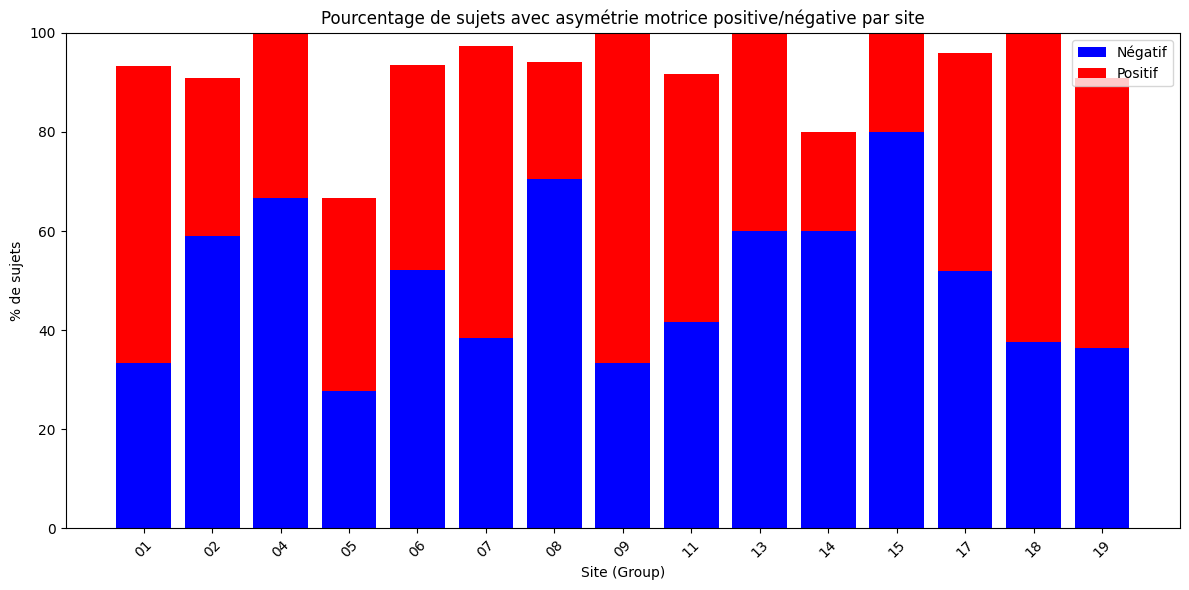

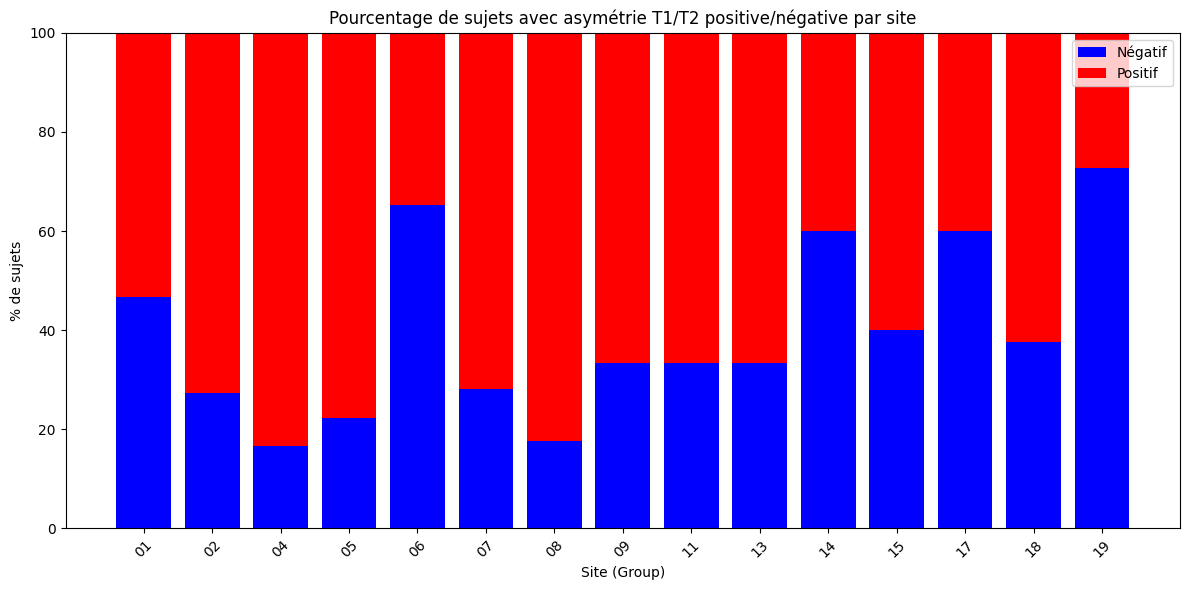

In [173]:
# Calculer le pourcentage de valeurs positives et négatives par site (Group)
summary = df_intersection.groupby('Group').apply(
    lambda g: pd.Series({
        'motor_symptom_asym_pos_%': (g['motor_symptom_asymetry'] > 0).mean() * 100,
        'motor_symptom_asym_neg_%': (g['motor_symptom_asymetry'] < 0).mean() * 100,
        'T1overT2_asym_pos_%': (g['T1overT2_asymetry_seg'] > 0).mean() * 100,
        'T1overT2_asym_neg_%': (g['T1overT2_asymetry_seg'] < 0).mean() * 100,
        'n_subjects': len(g)
    })
)

import matplotlib.pyplot as plt

# Préparer les données pour le graphique
pos = summary['motor_symptom_asym_pos_%']
neg = summary['motor_symptom_asym_neg_%']
groups = summary.index
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les barres négatives (bleu) et positives (rouge) empilées
ax.bar(groups, neg, color='blue', label='Négatif')
ax.bar(groups, pos, bottom=neg, color='red', label='Positif')

ax.set_ylabel('% de sujets')
ax.set_xlabel('Site (Group)')
ax.set_title('Pourcentage de sujets avec asymétrie motrice positive/négative par site')
ax.set_ylim(0, 100)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

# Préparer les données pour le graphique
pos = summary['T1overT2_asym_pos_%']
neg = summary['T1overT2_asym_neg_%']
groups = summary.index
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les barres négatives (bleu) et positives (rouge) empilées
ax.bar(groups, neg, color='blue', label='Négatif')
ax.bar(groups, pos, bottom=neg, color='red', label='Positif')

ax.set_ylabel('% de sujets')
ax.set_xlabel('Site (Group)')
ax.set_title('Pourcentage de sujets avec asymétrie T1/T2 positive/négative par site')
ax.set_ylim(0, 100)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

Traitement du patient : sub-01031FB_ses-M00
freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01031FB_ses-M00/T1overT2_N4_medianNorm.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01031FB_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01031FB_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01031FB_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01031FB_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5;


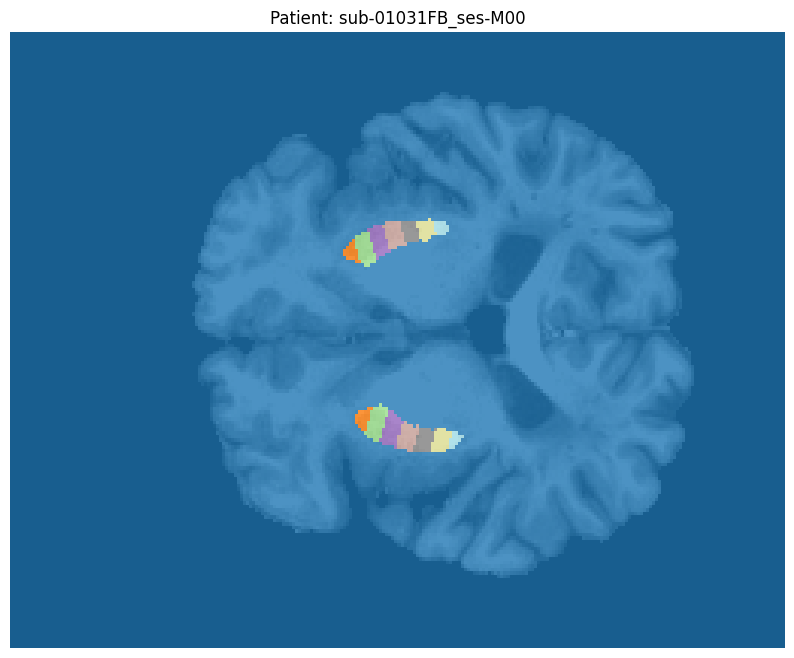

[1.067948920355327, 1.092674262099471, 1.2536924696262972, 1.3197583188103814, 1.3809764255292531, 1.4211020973335773, 1.2927227866081965, 0.9725369441233845, 1.017398147210388, 1.1868707659859328, 1.2384522242964, 1.3543584511830256, 1.4206443313749317, 1.3294157747711455]


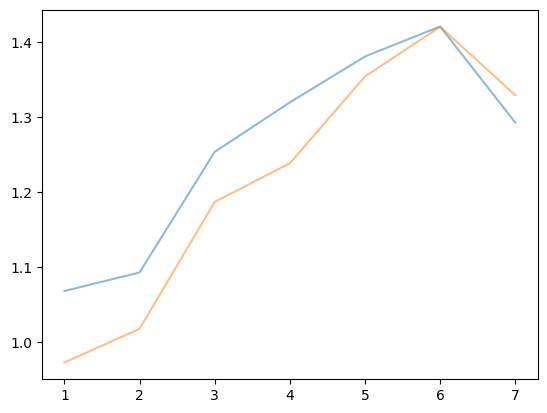

In [387]:
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

for patient_dir in glob.glob(os.path.join(base_dir, "sub-01031*_ses-M00")):
    patient_id = os.path.basename(patient_dir)
    print(f"Traitement du patient : {patient_id}")

    # Chemins des fichiers pour le patient actuel
    t1overt2_file = os.path.join(patient_dir, "T1overT2_N4_medianNorm.nii.gz")
    
    #left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    left_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    right_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

    print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
    
    # Extract the patient ID and format it to match df_cleaned.index
    patient_id = os.path.basename(patient_dir)
    subject = patient_id.replace("sub-", "").replace("_ses-M00", "")
    subject = subject[:2] + "-" + subject[2:-2]
    if subject in df_cleaned.index:
        # Lire les images NIfTI
        t1overt2_img = nib.load(t1overt2_file)
        t1overt2_data = t1overt2_img.get_fdata()

        left_seg_img = nib.load(left_seg_file)
        left_seg_data = left_seg_img.get_fdata()

        right_seg_img = nib.load(right_seg_file)
        right_seg_data = right_seg_img.get_fdata()

        # Créer une figure pour le patient actuel
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))

        # Créer une table de couleurs pour les segmentations
        colors = cm.tab20(np.linspace(0, 1, 20))
        cmap = ListedColormap(colors)

        # Afficher l'image T1/T2 en niveaux de gris
        slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))  # Trouver la slice avec la plus grande intégrale

        # Afficher les segmentations avec la table de couleurs et une transparence
        left_seg_slice = left_seg_data[:, slice_idx,:].T
        right_seg_slice = right_seg_data[:, slice_idx,:].T

        # Combiner les segmentations gauche et droite
        combined_seg_slice = left_seg_slice + right_seg_slice
        combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)

        min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
        max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
        ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', aspect='auto', vmin=min_val, vmax=max_val)
        ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')

        # Ajouter un titre avec l'ID du patient
        ax.set_title(f"Patient: {patient_id}")
        ax.axis('off')
        
        plt.show()

        # Calculate the mean of t1overt2_data for each ROI in left_seg_data
        rois_values = []
        for roi in range(1,8):
            roi_mask = left_seg_data == roi
            roi_mean = t1overt2_data[roi_mask].mean()
            rois_values.append(roi_mean)

        for roi in range(1,8):
            roi_mask = right_seg_data == roi
            roi_mean = t1overt2_data[roi_mask].mean()
            rois_values.append(roi_mean)

        print(rois_values)
        plt.plot(range(1, 8), rois_values[:7], alpha=0.5, label=f"{subject} (Left)")
        plt.plot(range(1, 8), rois_values[7:], alpha=0.5, label=f"{subject} (Right)")
        plt.show()

In [388]:
# Chemin vers le répertoire contenant les données des patients
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

# Créer un fichier PDF pour sauvegarder les figures
# pdf_filename = os.path.join(base_dir, "negatoscope_figures_t1overt2_new.pdf")
pdf_filename = os.path.join(base_dir, "negatoscope_figures_T1overT2_N4_Allsites.pdf")

sorted_patient_dirs = sorted(glob.glob(os.path.join(base_dir, "sub-*00")))

with PdfPages(pdf_filename) as pdf:
    # Parcourir les répertoires des patients
    # for patient in df_intersection.index:
    for dir_subj in sorted_patient_dirs :

        patient_id=dir_subj.split("/")[-1]
        #patient=index_map.get(sorted_patient_dirs[0].split("/")[-1][4:11])

        # Extraire l'ID du patient à partir du nom du répertoire
        #patient_id = inverse_index_map.get(patient) + "_ses-M00"
        patient_dir = os.path.join(base_dir, f"{patient_id}")
        
        # print(f"Traitement du patient : {patient_id}")

        # Chemins des fichiers pour le patient actuel
        # t1overt2_file = os.path.join(
        # , "t1overt2_norm_PSR.nii.gz")
#        t1overt2_file = os.path.join("/NAS/deathrow/protocoles/predistim/R2",patient_id[4:11] ,"R2_lin_3DT1.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "t2_LAS_rlon3DT1.nii.gz")
        t1overt2_file = os.path.join(patient_dir, "T1overT2_N4_medianNorm.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "QSMover_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "r2_norm_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "t1_PSR.nii.gz")
        left_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
        right_seg_file = os.path.join(patient_dir, "N4normalised", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

        print(patient_id, t1overt2_file, left_seg_file, right_seg_file)
        # Vérifier si les fichiers existent
        if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
             print(f"Fichiers manquants pour le patient {patient_id}, passage au suivant.")
             continue

        print(f"freeview -layout 1 -viewport axial {t1overt2_file} {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
        print(f"rm {patient_dir}_patient_id_*-putamen_axis1_7segments_t2w_values.txt")

        # Lire les images NIfTI
        t1overt2_img = nib.load(t1overt2_file)
        t1overt2_data = t1overt2_img.get_fdata()

        left_seg_img = nib.load(left_seg_file)
        left_seg_data = left_seg_img.get_fdata()

        right_seg_img = nib.load(right_seg_file)
        right_seg_data = right_seg_img.get_fdata()

        # Créer une figure pour le patient actuel
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))

        # Créer une table de couleurs pour les segmentations
        colors = cm.tab20(np.linspace(0, 1, 20))
        cmap = ListedColormap(colors)

        # Afficher l'image T1/T2 en niveaux de gris
        slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))  # Trouver la slice avec la plus grande intégrale

        # Afficher les segmentations avec la table de couleurs et une transparence
        left_seg_slice = left_seg_data[:, slice_idx,:].T
        right_seg_slice = right_seg_data[:, slice_idx,:].T

        # Combiner les segmentations gauche et droite
        combined_seg_slice = left_seg_slice + right_seg_slice
        combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)

        ################################BARYCENTER to flip segments 1 and 7 if needed##########################
        # Calculer les coordonnées du barycentre pour les ROIs 1 et 7 pour left et right
        # Barycentre pour le ROI dans la segmentation gauche
        
        # left_coords_1 = np.argwhere(left_seg_data == 1)
        # left_barycenter_1 = np.mean(left_coords_1, axis=0) if left_coords_1.size > 0 else None

        # left_coords_7 = np.argwhere(left_seg_data == 7)
        # left_barycenter_7 = np.mean(left_coords_7, axis=0) if left_coords_7.size > 0 else None

        # if left_barycenter_1[0] > left_barycenter_7[0]:
        #     print(f"python inverseROInumber.py {left_seg_file}")

        # # Barycentre pour le ROI dans la segmentation droite
        # right_coords_1 = np.argwhere(right_seg_data == 1)
        # right_barycenter_1 = np.mean(right_coords_1, axis=0) if right_coords_1.size > 0 else None

        # right_coords_7 = np.argwhere(right_seg_data == 7)
        # right_barycenter_7 = np.mean(right_coords_7, axis=0) if right_coords_7.size > 0 else None

        # if right_barycenter_1[0] > right_barycenter_7[0]:
        #     print(f"python inverseROInumber.py {right_seg_file}")

        min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
        max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
        ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', aspect='auto', vmin=min_val, vmax=max_val)
        ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')

        # Ajouter un titre avec l'ID du patient
        ax.set_title(f"Patient: {patient_id}")
        ax.axis('off')
        
        #plt.show()
        # Ajouter la figure au PDF
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

print(f"PDF sauvegardé sous le nom : {pdf_filename}")


sub-01001SR_ses-M00 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/T1overT2_N4_medianNorm.nii.gz /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii
freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/T1overT2_N4_medianNorm.nii.gz /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/N4normalised/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii:col

In [393]:
mri['champ'].unique()

array(['3T', '1.5T'], dtype=object)

# R2Effectif

In [405]:
# lire le fichier Excel dans un DataFrame
file_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/Predistim_MRIdata_PDT2SE_Lille_15072025.xlsx"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"{file_path} introuvable")

df_pred = pd.read_excel(file_path, engine="openpyxl")
df_pred = df_pred.set_index("patient", drop=True)

# aperçu
print(f"Loaded {df_pred.shape[0]} rows x {df_pred.shape[1]} cols")
display(df_pred.head())

Loaded 623 rows x 11 cols


,Centre,Date d'IRM Dicom,constructeur,modèle,champ,logiciel,antenne,respect du protocole,QC PDT2TSE\n0: inexploitable 1: très limite 2: passable 3: bien\n4: parfaite,décision PDT2TSE\n0: rejet\n1: ok,commentaire PDT2TSE qualité (paramètrès)
patient,,,,,,,,,,,
01001SR,Lille,2013-11-20 00:00:00,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,2,1,rides+ (pas Ipat + 8ch)
01002TM,Lille,2014-01-15 00:00:00,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,2,1,rides+ (pas Ipat + 8ch)
01003SJ,Lille,2014-03-04 00:00:00,Philips,Achieva,3T,"['3.2.2', '3.2.2.0']",SENSE-Head-8,partiel,0,0,mouvements+++ (pas Ipat + 8ch)
01004DJ,Lille,2014-05-14 00:00:00,Philips,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,2,0,mouvements+++ (pas Ipat + 8ch)
01005LB,Lille,2014-06-18 00:00:00,Philips,Achieva,3T,"['3.2.3', '3.2.3.1']",SENSE-Head-8,partiel,2,1,quelques rides (pas Ipat + 8ch)


In [407]:
import os

# Lire le fichier SN r2 effective

sn_file = "/NAS/deathrow/protocoles/predistim/csv_xlsx/Predistim_SNr2effective_values.csv"
if not os.path.exists(sn_file):
    raise FileNotFoundError(f"{sn_file} introuvable")

df_sn = pd.read_csv(sn_file, low_memory=False, delimiter="\t")
print(f"Loaded {df_sn.shape[0]} rows x {df_sn.shape[1]} cols")
df_sn = df_sn.set_index("patient", drop=True)

print(df_sn.columns.tolist())
display(df_sn.head())


Loaded 614 rows x 3 cols
['R2eff_SN_Left', 'R2eff_SN_Right']


,R2eff_SN_Left,R2eff_SN_Right
patient,,
01001SR,12.797028,12.373303
01002TM,14.492634,14.159164
01003SJ,11.657924,13.721390
01004DJ,14.161714,14.250443
01005LB,13.584180,12.993931


Stats R2eff_SN_pooled par constructeur :
       count       mean     median       std
champ                                       
3T       570  10.607157  12.766646  5.365684
1.5T      44   1.371809   0.011222  3.858486


<Figure size 1000x600 with 0 Axes>

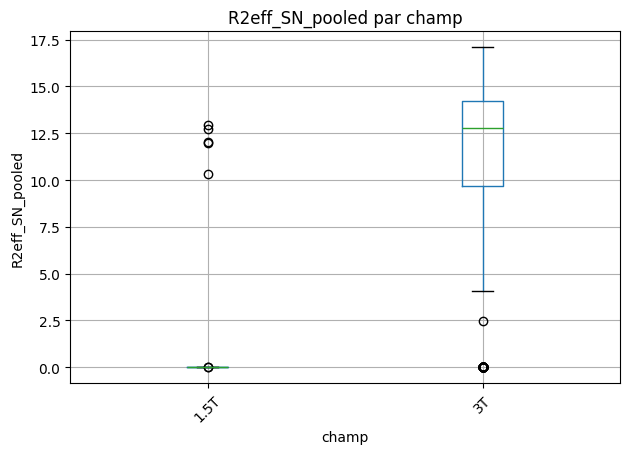

In [412]:
# Pool R2eff_SN left+right then repeat stats/boxplot by constructeur
# Uses existing df_sn, df_pred, plt

# copy and detect left/right R2 columns
sn = df_sn.copy()

left_cols = [c for c in sn.columns if 'r2' in c.lower() and 'left' in c.lower()]
right_cols = [c for c in sn.columns if 'r2' in c.lower() and ('right' in c.lower() or 'rght' in c.lower())]

# fallback: look for typical suffixes if previous search fails
if not left_cols or not right_cols:
    for c in sn.columns:
        lc = c.lower()
        if 'r2' in lc and lc.endswith('_left'):
            left_cols = [c]
        if 'r2' in lc and lc.endswith('_right'):
            right_cols = [c]

# if still missing, try any r2-like columns and assign first two as left/right
r2_like = [c for c in sn.columns if 'r2' in c.lower() or 'r2eff' in c.lower()]
if not left_cols and r2_like:
    left_cols = [r2_like[0]]
if not right_cols and len(r2_like) > 1:
    right_cols = [r2_like[1]]

if not (left_cols or right_cols):
    raise KeyError(f"Aucune colonne R2 détectée dans df_sn. Colonnes: {sn.columns.tolist()}")

# coerce to numeric
for c in (left_cols + right_cols):
    if c in sn.columns:
        sn[c] = pd.to_numeric(sn[c], errors='coerce')

# create pooled R2 (mean of available sides)
cols_to_pool = [c for c in left_cols + right_cols if c in sn.columns]
sn['R2eff_SN_pooled'] = sn[cols_to_pool].mean(axis=1, skipna=True)

# join with df_pred
df_join = sn[['R2eff_SN_pooled']].join(df_pred, how='inner')

# identify constructor column
#ctor_candidates = [c for c in df_join.columns if 'constructeur' in c.lower() or 'modèle' in c.lower() or 'manufacturer' in c.lower() or 'vendor' in c.lower()]
ctor_candidates=['champ']
if not ctor_candidates:
    raise KeyError(f"Aucune colonne constructeur trouvée dans df_join. Colonnes: {df_join.columns.tolist()}")
ctor_col = ctor_candidates[0]

# prepare plot dataframe
df_join['R2eff_SN_pooled'] = pd.to_numeric(df_join['R2eff_SN_pooled'], errors='coerce')
df_plot = df_join[[ 'R2eff_SN_pooled', ctor_col]].dropna()

# stats by constructeur
group_stats = df_plot.groupby(ctor_col)['R2eff_SN_pooled'].agg(['count','mean','median','std']).sort_values('mean', ascending=False)
print("Stats R2eff_SN_pooled par constructeur :")
print(group_stats)

# boxplot
plt.figure(figsize=(10,6))
df_plot.boxplot(column='R2eff_SN_pooled', by=ctor_col, rot=45)
plt.title("R2eff_SN_pooled par " + ctor_col)
plt.suptitle("")
plt.ylabel("R2eff_SN_pooled")
plt.tight_layout()
plt.show()

In [413]:
import shutil
from datetime import datetime

# réécrire le CSV SN en y ajoutant les colonnes constructeur / modèle / champ

# fichiers existants (déjà définis plus haut dans le notebook)
# sn_file  -> chemin du CSV original
# df_sn    -> dataframe des valeurs SN (index = patient)
# df_pred  -> dataframe metadata MRI (index = patient)

if not os.path.exists(sn_file):
    raise FileNotFoundError(f"{sn_file} introuvable")

# sauvegarde du fichier original
bak = sn_file + ".bak." + datetime.now().strftime("%Y%m%d-%H%M%S")
shutil.copy2(sn_file, bak)
print(f"Backup créé: {bak}")

# rechercher colonnes candidates dans df_pred (robuste aux accents/variantes)
def find_col(df, keywords):
    cols = df.columns
    for kw in keywords:
        matches = [c for c in cols if kw.lower() in c.lower()]
        if matches:
            return matches[0]
    return None

col_constructeur = find_col(df_pred, ["constructeur", "manufacturer", "vendor", "fabricant"])
col_modele       = find_col(df_pred, ["modèle", "modele", "model", "modèle"])
col_champ        = find_col(df_pred, ["champ", "field", "b0", "tesla"])

selected = {}
selected["constructeur"] = col_constructeur
selected["modèle"] = col_modele
selected["champ"] = col_champ

for k, v in selected.items():
    if v is None:
        print(f"Avertissement: colonne pour '{k}' non trouvée dans df_pred -> sera remplie de NaN")

# extraire les colonnes (ou créer colonnes vides si manquantes)
cols_to_join = {}
for out_name, src_col in selected.items():
    if src_col is not None and src_col in df_pred.columns:
        cols_to_join[out_name] = df_pred[src_col]
    else:
        cols_to_join[out_name] = pd.Series(index=df_pred.index, dtype=object)

meta_df = pd.DataFrame(cols_to_join)
# joiner sur l'index patient (df_sn et df_pred ont l'index 'patient')
df_out = df_sn.join(meta_df, how="left")

# sauvegarde (écrase l'original comme demandé)
df_out.to_csv("/NAS/deathrow/protocoles/predistim/csv_xlsx/Predistim_SNr2effective_valuesWithCov.csv", sep="\t", index=True)
print(f"Fichier réécrit avec colonnes supplémentaires : {sn_file}")
print(f"Total lignes: {len(df_out)}, lignes contenant au moins un constructeur/modèle/champ non-NaN: {df_out[['constructeur','modèle','champ']].dropna(how='all').shape[0]}")

Backup créé: /NAS/deathrow/protocoles/predistim/csv_xlsx/Predistim_SNr2effective_values.csv.bak.20251114-173322
Fichier réécrit avec colonnes supplémentaires : /NAS/deathrow/protocoles/predistim/csv_xlsx/Predistim_SNr2effective_values.csv
Total lignes: 614, lignes contenant au moins un constructeur/modèle/champ non-NaN: 614
